___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
(Waad and Noof)
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [46]:
#import important libraries 
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc, precision_recall_curve,plot_precision_recall
import xgboost as xgb
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_validate, GridSearchCV ,cross_val_score, cross_validate ,RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
    roc_auc_score,
)


#since we have a huge number of features this line show all rows and columns 
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 80000)

plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
# import dataframes
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")
# merge dataframes
df = pd.concat([df_male, df_female])
df = df.reset_index()
df

# Copy dataframe for manipulating
df_copy = df.copy()

In [3]:
df_copy

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0         0  10027.000                             266            1467   
1         1  10032.000                             233            1395   
2         2  10033.000                             287            1430   
3         3  10092.000                             234            1347   
4         4  10093.000                             250            1585   
...     ...        ...                             ...             ...   
6063   1981        NaN                             285            1392   
6064   1982        NaN                             262            1324   
6065   1983        NaN                             260            1334   
6066   1984        NaN                             205            1293   
6067   1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     71               319                        291   
1                     67               344                        320   
2                     75               345                        330   
3                     73               328                        309   
4                     80               340                        310   
...                  ...               ...                        ...   
6063                  72               306                        282   
6064                  66               309                

In [4]:
# Height and weight are repeated
## drop the self_reported
## Convert the unit
df_copy.loc[:, ["weightkg", "Weightlbs", "Heightin", "stature"]]
df_copy["weightkg"] = df_copy["weightkg"] / 10
df_copy

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0         0  10027.000                             266            1467   
1         1  10032.000                             233            1395   
2         2  10033.000                             287            1430   
3         3  10092.000                             234            1347   
4         4  10093.000                             250            1585   
...     ...        ...                             ...             ...   
6063   1981        NaN                             285            1392   
6064   1982        NaN                             262            1324   
6065   1983        NaN                             260            1334   
6066   1984        NaN                             205            1293   
6067   1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     71               319                        291   
1                     67               344                        320   
2                     75               345                        330   
3                     73               328                        309   
4                     80               340                        310   
...                  ...               ...                        ...   
6063                  72               306                        282   
6064                  66               309                

## Explore Data

In [5]:
df_copy.describe(include="O").T

count unique                     top  freq
Gender                 6068      2                    Male  4082
Date                   6068    253               27-Feb-12    45
Installation           6068     12             Camp Shelby  1160
Component              6068      3            Regular Army  3140
Branch                 6068      3  Combat Service Support  3174
PrimaryMOS             6068    285                     11B   671
SubjectsBirthLocation  6068    152              California   446
Ethnicity              1421    209                 Mexican   357
WritingPreference      6068      3              Right hand  5350

In [6]:
df_copy["WritingPreference"].value_counts()

WritingPreference
Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: count, dtype: int64

In [7]:
p = pd.crosstab( df_copy.Component,df_copy.DODRace, margins=True, margins_name="Total", normalize='index')
p


DODRace                 1     2     3     4     5     6     8
Component                                                    
Army National Guard 0.685 0.184 0.093 0.022 0.009 0.006 0.000
Army Reserve        0.518 0.236 0.186 0.041 0.005 0.014 0.000
Regular Army        0.581 0.238 0.123 0.038 0.008 0.012 0.001
Total               0.625 0.214 0.112 0.031 0.008 0.010 0.000

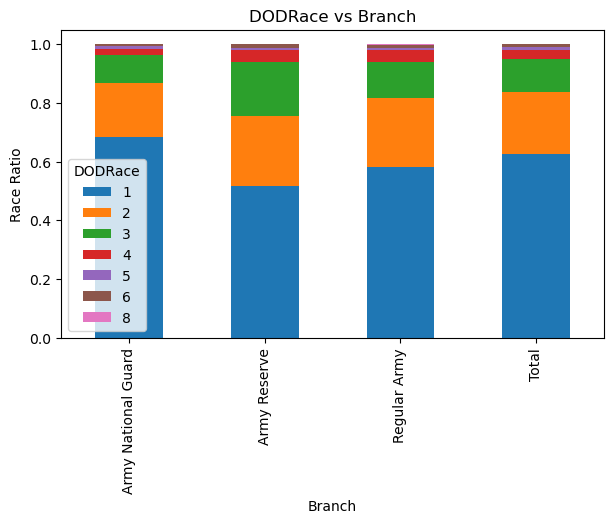

In [8]:
p.plot(kind='bar', stacked=True)
plt.title('DODRace vs Branch')
plt.xlabel('Branch')
plt.ylabel('Race Ratio')
plt.show()

In [9]:
df_copy["SubjectsBirthLocation"]

0         North Dakota
1             New York
2             New York
3            Wisconsin
4       North Carolina
             ...      
6063             Texas
6064             Texas
6065             Texas
6066             Texas
6067             Texas
Name: SubjectsBirthLocation, Length: 6068, dtype: object

In [10]:
df_copy = df_copy.drop(
    [
        "Ethnicity",
        "PrimaryMOS",
        "SubjectNumericRace",
        "Weightlbs",
        "Heightin",
        "Installation",
        "subjectid",
        "SubjectId",
        "Date",
        "Branch",
        "Component",
        "index",
    ],
    axis=1,
)


# Ethnicity Because many missing values >50%
# "PrimaryMOS", "SubjectsBirthLocation" becuase have many unique values
# "SubjectNumericRace" it may mislead the conclusion [It is similar to the target
# Installation it is about the place that the measurments ocour and we do not need it
# Drop ID number since there is no benefit of it during modeling

In [11]:
# Look for DODRace with >= 500 observations
df_copy.groupby("DODRace").count()

abdominalextensiondepthsitting  acromialheight  \
DODRace                                                   
1                                  3792            3792   
2                                  1298            1298   
3                                   679             679   
4                                   188             188   
5                                    49              49   
6                                    59              59   
8                                     3               3   

         acromionradialelength  anklecircumference  axillaheight  \
DODRace                                                            
1                         3792                3792          3792   
2                         1298                1298          1298   
3                          679                 679           679   
4                          188                 188           188   
5                           49                  49            49   
6                           59                  59            59   
8                            3                   3             3   

         balloffootcircumference  balloffootlength  biacromialbreadth  \
DODRace                                                                 
1                           3792              3792               3792   
2                           1298              1298               1298   
3                            679               679                679   
4                            188               188                188   
5                             49                49                 49   
6                             59                59                 59   
8                              3                 3                  3   

         bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
DODRace                                                                  
1                             3792              3792              3792   
2                             1298              1298              1298   
3                              679               679               679   
4                              188               188               188   
5                               49                49                49   
6                               59                59                59   
8                                3                 3                 3   

         bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
DODRace                                                                    
1                      3792              3792                       3792   
2                      1298              1298                       1298   
3                       679               679                        679   
4                       188               188                        188   
5                        49                49                         49   
6                        59                59                         59   
8                         3                 3                          3   

         bizygomaticbreadth  buttockcircumference  buttockdepth  \
DODRace                                                           
1                      3792                  3792          3792   
2                      1298                  1298          1298   
3                       679                   679           679   
4                       188                   188           188   
5                        49                    49            49   
6                        59                    59            59   
8                         3                     3             3   

         buttockheight  buttockkneelength  buttockpopliteallength  \
DODRace                                                             
1                 3792               3792                    3792   
2                 1298               1298  

In [12]:
# Just DODRace with > 500 observations
df_copy = df_copy.query("DODRace in [1, 2, 3]")
df_copy.groupby("DODRace").count()
df_copy

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
6063                             285            1392                    335   
6064                             262            1324                    301   
6065                             260            1334                    318   
6066                             205            1293                    302   
6067                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
6063                 223          1297                      252   
6064                 202          1204                      236   
6065                 213          1259                      234   
6066                 199          1207                      213   
6067                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
6063               196                368                        299   
6064               181                378                        294   
6065               183                363                        332   
6066               163                376                        276   
6067               188                361                        285   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  274               493                  71   
1                  257               479                  67   
2                  261               544                  75   
3                  262               518                  73   
4                  263               524                  80   
...                ...               ...                 ...   
6063               312               477                  72   
6064               287               468                  66   
6065               299               460                  70   
6066               280               426                  62   
6067               279               433                  71   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
0                  319                        291                 142   
1                  344                        320                 135   
2                  345                        330                 135   
3                  328                        309                 143   
4                  340                        310                 138   
...                ...                        ...                 ...   
6063               306                        282                 136   
6064               309            

In [13]:
df_copy["DODRace"] = df_copy.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)

In [14]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [15]:
#check missing values
df_copy.isnull().sum().sum()

0

In [16]:
# Check duplicates
df.duplicated().sum()

0

In [17]:
# Calculate the correlation matrix
correlation_matrix = df_copy.corr(numeric_only=True)

pd.set_option("display.max_rows", None)
correlation_matrix
# Display the correlation matrix with colors
# print(correlation_matrix.style.background_gradient(cmap='coolwarm'))


def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = "red"
    else:
        color = "black"
    return f"color: {color}"


pd.DataFrame(correlation_matrix).corr().style.applymap(color_red)


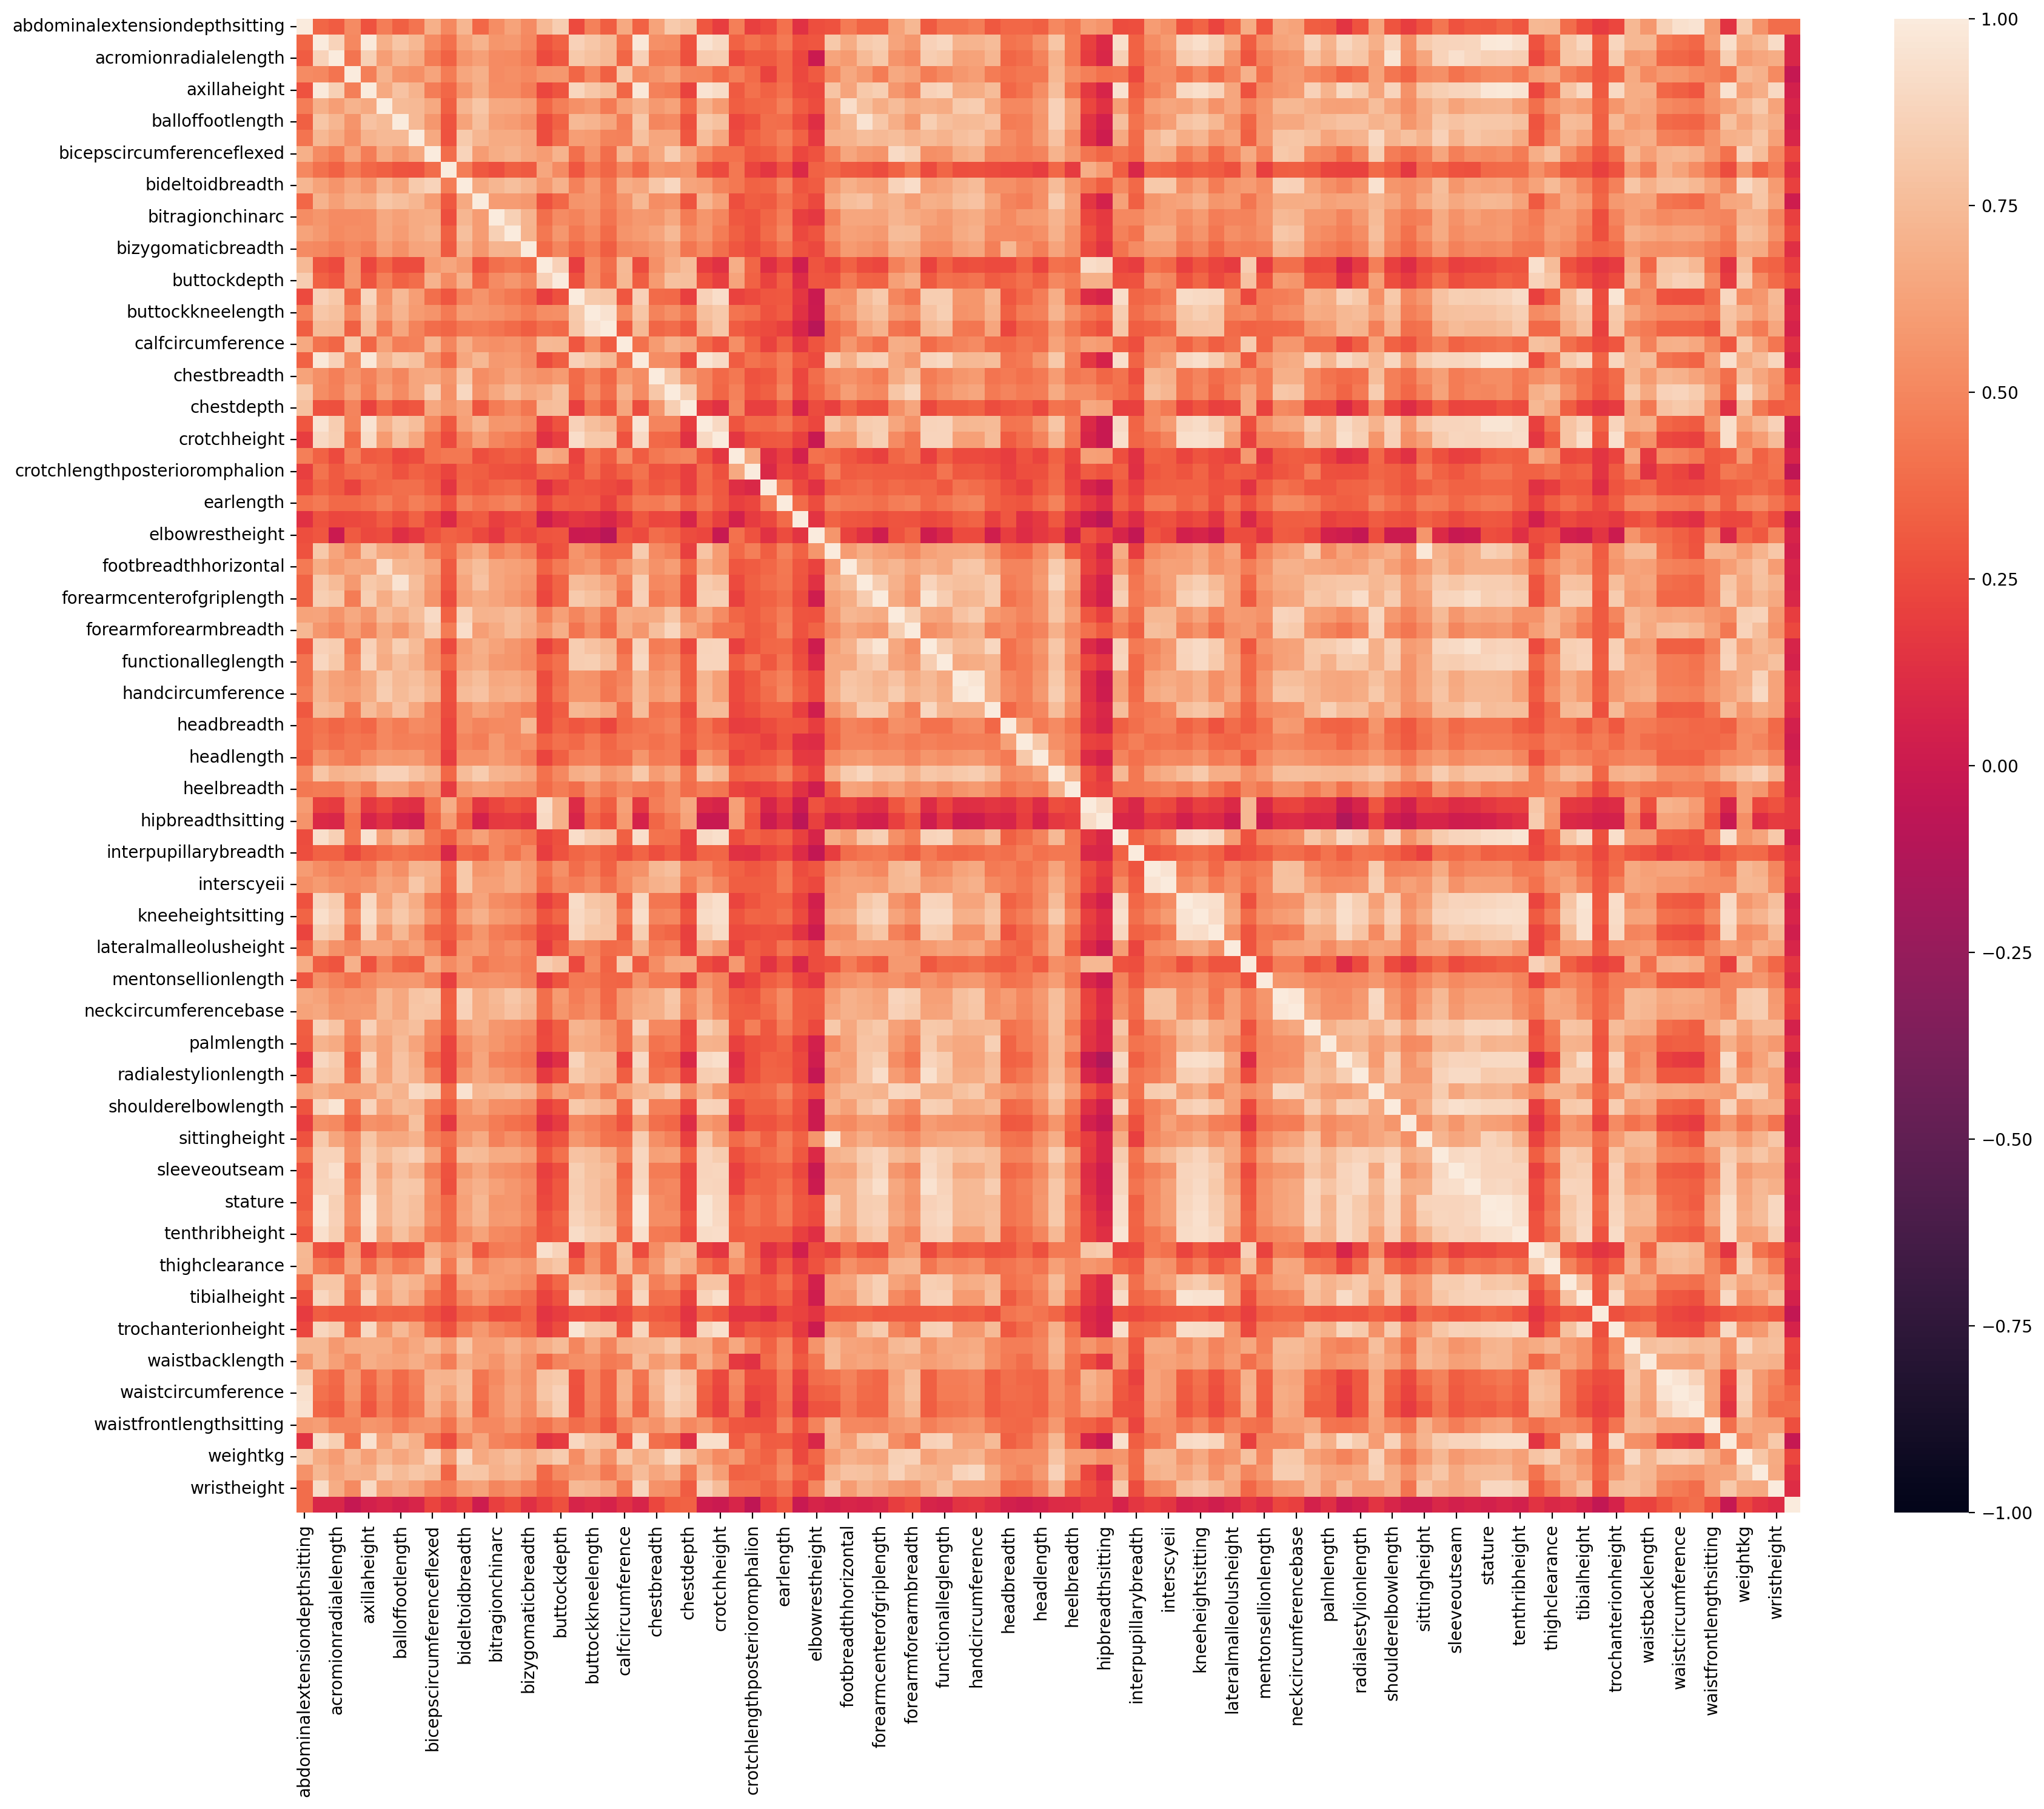

In [18]:
plt.figure(figsize=(20, 16), dpi=200)
sns.heatmap(df_copy.corr(numeric_only=True), vmin=-1, vmax=1);

In [19]:
df_copy.info(max_cols=50)

<class 'pandas.core.frame.DataFrame'>
Index: 5769 entries, 0 to 6067
Columns: 98 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: float64(1), int64(93), object(4)
memory usage: 4.4+ MB


In [20]:
df_copy['SubjectsBirthLocation'].value_counts()

SubjectsBirthLocation
California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota      

In [21]:
df_copy.shape

(5769, 98)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [22]:
# Encode nominal categorical features
categorical  = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [23]:
df_copy["SubjectsBirthLocation"].nunique()

136

In [24]:

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [25]:
df_copy.shape

(5769, 98)

In [26]:
# Split the data
X = df_copy.drop(["DODRace"], axis=1)
y = df_copy["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [27]:
y_train

4288       White
2483       White
3741       Black
5222       White
1040       White
3184       White
2435       Black
1392       Black
340        White
92         White
3998       Black
4679       Black
2399       White
5725    Hispanic
4516       White
4373       Black
4315       White
880        White
5195    Hispanic
6038       Black
5374       Black
3194       White
3880       White
5791       White
1086       White
3227       White
2636       White
298        Black
374        White
5518       Black
5849       White
5904       White
2103       White
4654       Black
3700       White
4798       White
2126    Hispanic
1380       White
3334       Black
4228       Black
4243       White
3124       White
2456       White
2377       White
3192       White
1335       White
492        White
5780       Black
4528       White
466        White
4547       Black
2469    Hispanic
5981       White
3420       Black
1116       White
4901       Black
5490       White
5541       White
3371       Whi

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.


## 1. Logistic model

### Vanilla Logistic Model

In [28]:

sc = StandardScaler()

lr = LogisticRegression()

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [29]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [30]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 352   10   27]
 [  12  125   67]
 [  13   36 1089]]
              precision    recall  f1-score   support

       Black       0.93      0.90      0.92       389
    Hispanic       0.73      0.61      0.67       204
       White       0.92      0.96      0.94      1138

    accuracy                           0.90      1731
   macro avg       0.86      0.82      0.84      1731
weighted avg       0.90      0.90      0.90      1731


Train_Set
[[ 858    7   44]
 [  14  312  149]
 [  22   62 2570]]
              precision    recall  f1-score   support

       Black       0.96      0.94      0.95       909
    Hispanic       0.82      0.66      0.73       475
       White       0.93      0.97      0.95      2654

    accuracy                           0.93      4038
   macro avg       0.90      0.86      0.88      4038
weighted avg       0.92      0.93      0.92      4038



### Cross validation

In [31]:

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=10,
    return_train_score=True,
    verbose = 3,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  accuracy: (train=0.927, test=0.894) f1_weighted: (train=0.925, test=0.892) precision_weighted: (train=0.925, test=0.892) recall_weighted: (train=0.927, test=0.894) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END  accuracy: (train=0.929, test=0.913) f1_weighted: (train=0.926, test=0.907) precision_weighted: (train=0.927, test=0.913) recall_weighted: (train=0.929, test=0.913) total time=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END  accuracy: (train=0.933, test=0.886) f1_weighted: (train=0.930, test=0.880) precision_weighted: (train=0.931, test=0.877) recall_weighted: (train=0.933, test=0.886) total time=   0.4s
[CV] END  accuracy: (train=0.927, test=0.899) f1_weighted: (train=0.924, test=0.896) precision_weighted: (train=0.925, test=0.896) recall_weighted: (train=0.927, test=0.899) total time=   0.4s
[CV] END  accuracy: (train=0.926, test=0.899) f1_weighted: (train=0.924, test=0.896) precision_weighted: (train=0.924, test=0.894) recall_weighted: (train=0.926, test=0.899) total time=   0.4s
[CV] END  accuracy: (train=0.930, test=0.899) f1_weighted: (train=0.927, test=0.892) precision_weighted: (train=0.928, test=0.894) recall_weighted: (train=0.930, test=0.899) total time=   0.4s
[CV] END  accuracy: (train=0.930, test=0.908) f1_weighted: (train=0.927, test=0.906) precision_weighted: (train=0.928, test=0.905) recall_weighted: (train=0.930, test=0.908) total time=   0.4s
[CV] END  accuracy: (train=0.924, t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.5s finished


fit_time                   0.462
score_time                 0.045
test_accuracy              0.897
train_accuracy             0.929
test_precision_weighted    0.894
train_precision_weighted   0.926
test_recall_weighted       0.897
train_recall_weighted      0.929
test_f1_weighted           0.893
train_f1_weighted          0.926
dtype: float64

In [32]:


# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels=['Hispanic'])
precision_hispanic = make_scorer(precision_score, average=None, labels=['Hispanic'])
recall_hispanic = make_scorer(recall_score, average=None, labels=['Hispanic'])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [33]:

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True ,verbose = 3
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  f1_hispanic: (train=0.726, test=0.697) precision_hispanic: (train=0.822, test=0.738) recall_hispanic: (train=0.650, test=0.660) total time=   0.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END  f1_hispanic: (train=0.735, test=0.667) precision_hispanic: (train=0.832, test=0.893) recall_hispanic: (train=0.659, test=0.532) total time=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] END  f1_hispanic: (train=0.755, test=0.512) precision_hispanic: (train=0.848, test=0.600) recall_hispanic: (train=0.680, test=0.447) total time=   0.4s
[CV] END  f1_hispanic: (train=0.736, test=0.706) precision_hispanic: (train=0.832, test=0.811) recall_hispanic: (train=0.660, test=0.625) total time=   0.4s
[CV] END  f1_hispanic: (train=0.730, test=0.607) precision_hispanic: (train=0.824, test=0.659) recall_hispanic: (train=0.656, test=0.562) total time=   0.5s
[CV] END  f1_hispanic: (train=0.744, test=0.608) precision_hispanic: (train=0.852, test=0.774) recall_hispanic: (train=0.660, test=0.500) total time=   0.4s
[CV] END  f1_hispanic: (train=0.733, test=0.690) precision_hispanic: (train=0.842, test=0.769) recall_hispanic: (train=0.649, test=0.625) total time=   0.4s
[CV] END  f1_hispanic: (train=0.710, test=0.753) precision_hispanic: (train=0.817, test=0.778) recall_hispanic: (train=0.628, test=0.729) total time=   0.4s
[CV] END  f1_hispanic: (train=0.735, test=0.674) precision

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.9s finished


fit_time                   0.491
score_time                 0.055
test_f1_hispanic           0.646
train_f1_hispanic          0.735
test_precision_hispanic    0.739
train_precision_hispanic   0.835
test_recall_hispanic       0.581
train_recall_hispanic      0.657
dtype: float64

# LR with balancing 

In [34]:
lr_b = LogisticRegression(class_weight='balanced')

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr_b)]

pipe_model_b = Pipeline(steps=operations)

pipe_model_b.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [35]:
eval_metric(pipe_model_b, X_train, y_train, X_test, y_test)

Test_Set
[[350  24  15]
 [ 12 158  34]
 [ 21 139 978]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       389
    Hispanic       0.49      0.77      0.60       204
       White       0.95      0.86      0.90      1138

    accuracy                           0.86      1731
   macro avg       0.79      0.84      0.80      1731
weighted avg       0.89      0.86      0.87      1731


Train_Set
[[ 866   21   22]
 [  13  409   53]
 [  57  307 2290]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94       909
    Hispanic       0.55      0.86      0.67       475
       White       0.97      0.86      0.91      2654

    accuracy                           0.88      4038
   macro avg       0.82      0.89      0.84      4038
weighted avg       0.91      0.88      0.89      4038



### Cross validation

In [36]:
operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=10,
    return_train_score=True,
    verbose = 3,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  accuracy: (train=0.927, test=0.894) f1_weighted: (train=0.925, test=0.892) precision_weighted: (train=0.925, test=0.892) recall_weighted: (train=0.927, test=0.894) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END  accuracy: (train=0.929, test=0.913) f1_weighted: (train=0.926, test=0.907) precision_weighted: (train=0.927, test=0.913) recall_weighted: (train=0.929, test=0.913) total time=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] END  accuracy: (train=0.933, test=0.886) f1_weighted: (train=0.930, test=0.880) precision_weighted: (train=0.931, test=0.877) recall_weighted: (train=0.933, test=0.886) total time=   0.4s
[CV] END  accuracy: (train=0.927, test=0.899) f1_weighted: (train=0.924, test=0.896) precision_weighted: (train=0.925, test=0.896) recall_weighted: (train=0.927, test=0.899) total time=   0.4s
[CV] END  accuracy: (train=0.926, test=0.899) f1_weighted: (train=0.924, test=0.896) precision_weighted: (train=0.924, test=0.894) recall_weighted: (train=0.926, test=0.899) total time=   0.5s
[CV] END  accuracy: (train=0.930, test=0.899) f1_weighted: (train=0.927, test=0.892) precision_weighted: (train=0.928, test=0.894) recall_weighted: (train=0.930, test=0.899) total time=   0.4s
[CV] END  accuracy: (train=0.930, test=0.908) f1_weighted: (train=0.927, test=0.906) precision_weighted: (train=0.928, test=0.905) recall_weighted: (train=0.930, test=0.908) total time=   0.4s
[CV] END  accuracy: (train=0.924, t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.0s finished


fit_time                   0.478
score_time                 0.056
test_accuracy              0.897
train_accuracy             0.929
test_precision_weighted    0.894
train_precision_weighted   0.926
test_recall_weighted       0.897
train_recall_weighted      0.929
test_f1_weighted           0.893
train_f1_weighted          0.926
dtype: float64

In [37]:
operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr_b)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True ,verbose = 3
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  f1_hispanic: (train=0.673, test=0.647) precision_hispanic: (train=0.549, test=0.500) recall_hispanic: (train=0.871, test=0.915) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END  f1_hispanic: (train=0.678, test=0.648) precision_hispanic: (train=0.556, test=0.574) recall_hispanic: (train=0.867, test=0.745) total time=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] END  f1_hispanic: (train=0.697, test=0.548) precision_hispanic: (train=0.580, test=0.442) recall_hispanic: (train=0.871, test=0.723) total time=   0.5s
[CV] END  f1_hispanic: (train=0.668, test=0.661) precision_hispanic: (train=0.543, test=0.557) recall_hispanic: (train=0.867, test=0.812) total time=   0.4s
[CV] END  f1_hispanic: (train=0.678, test=0.589) precision_hispanic: (train=0.557, test=0.469) recall_hispanic: (train=0.867, test=0.792) total time=   0.4s
[CV] END  f1_hispanic: (train=0.695, test=0.564) precision_hispanic: (train=0.577, test=0.500) recall_hispanic: (train=0.874, test=0.646) total time=   0.5s
[CV] END  f1_hispanic: (train=0.676, test=0.672) precision_hispanic: (train=0.554, test=0.574) recall_hispanic: (train=0.867, test=0.812) total time=   0.5s
[CV] END  f1_hispanic: (train=0.673, test=0.651) precision_hispanic: (train=0.552, test=0.526) recall_hispanic: (train=0.864, test=0.854) total time=   0.5s
[CV] END  f1_hispanic: (train=0.673, test=0.544) precision

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.1s finished


fit_time                   0.500
score_time                 0.053
test_f1_hispanic           0.604
train_f1_hispanic          0.680
test_precision_hispanic    0.496
train_precision_hispanic   0.560
test_recall_hispanic       0.779
train_recall_hispanic      0.867
dtype: float64

### Logistic Model GridsearchCV

In [38]:

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]
pipe_model = Pipeline(steps=operations)
param_grid = {
    "logistic__C": [0.01, 0.1, 1, 100],  # 100, 1000
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "saga"],
    "logistic__class_weight": ["balanced", None],
}

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=f1_hispanic, return_train_score=True,verbose =3
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.615, test=0.639) total time=   0.2s
[CV 2/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.620, test=0.655) total time=   0.3s
[CV 3/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.637, test=0.545) total time=   0.2s
[CV 4/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.604, test=0.651) total time=   0.2s
[CV 5/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.645, test=0.515) total time=   0.2s
[CV 1/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=saga;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 100],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [39]:
grid_search.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    solver='liblinear'))])

In [40]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.660
mean_train_score   0.731
Name: 10, dtype: object

In [41]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[ 361   13   15]
 [  11  141   52]
 [  20   61 1057]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92       389
    Hispanic       0.66      0.69      0.67       204
       White       0.94      0.93      0.93      1138

    accuracy                           0.90      1731
   macro avg       0.84      0.85      0.84      1731
weighted avg       0.90      0.90      0.90      1731


Train_Set
[[ 866   11   32]
 [  20  350  105]
 [  43  122 2489]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94       909
    Hispanic       0.72      0.74      0.73       475
       White       0.95      0.94      0.94      2654

    accuracy                           0.92      4038
   macro avg       0.87      0.88      0.87      4038
weighted avg       0.92      0.92      0.92      4038



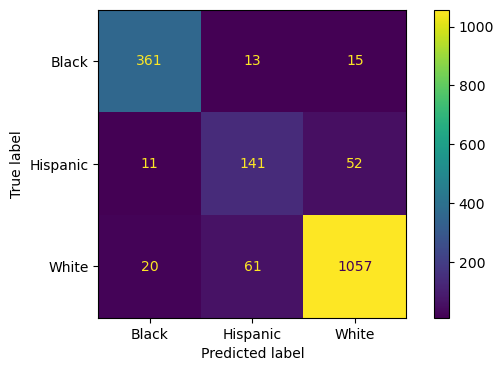

In [42]:
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test);

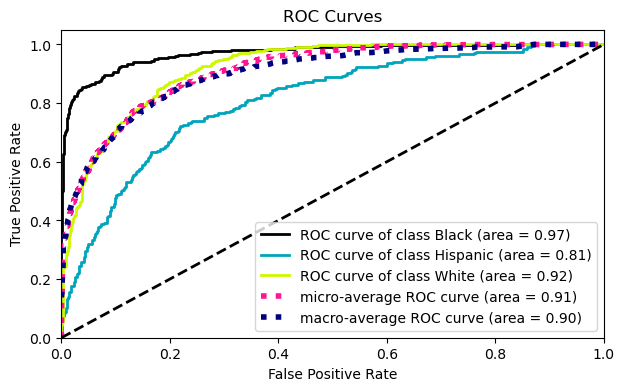

In [43]:

operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(C=0.01, class_weight='balanced', solver='saga')
)]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

In [44]:
y_pred = grid_search.predict(X_test)


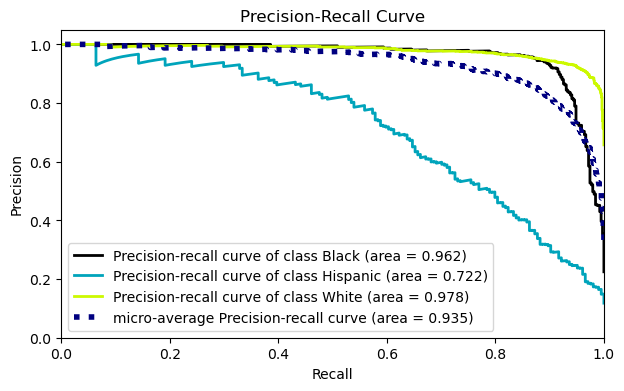

In [48]:

operations = [
    ("encoder", column_trans),
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(C=0.1, class_weight="balanced", solver="saga")),
]

grid_search = Pipeline(steps=operations)

grid_search.fit(X_train, y_train)

y_pred_proba = grid_search.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [49]:
y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.7215844725507491

In [50]:


lr_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
lr_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
lr_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model

In [51]:

operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC())]

SVM_pipe_model = Pipeline(steps=operations)


In [52]:
SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 336    3   50]
 [  11   81  112]
 [  12   13 1113]]
              precision    recall  f1-score   support

       Black       0.94      0.86      0.90       389
    Hispanic       0.84      0.40      0.54       204
       White       0.87      0.98      0.92      1138

    accuracy                           0.88      1731
   macro avg       0.88      0.75      0.79      1731
weighted avg       0.88      0.88      0.87      1731


Train_Set
[[ 833    4   72]
 [  16  229  230]
 [   8    9 2637]]
              precision    recall  f1-score   support

       Black       0.97      0.92      0.94       909
    Hispanic       0.95      0.48      0.64       475
       White       0.90      0.99      0.94      2654

    accuracy                           0.92      4038
   macro avg       0.94      0.80      0.84      4038
weighted avg       0.92      0.92      0.91      4038



### cross validation

In [53]:

scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 5,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_hispanic           0.553
train_f1_hispanic          0.630
test_precision_hispanic    0.911
train_precision_hispanic   0.949
test_recall_hispanic       0.398
train_recall_hispanic      0.472
dtype: float64

## svm with balancing

In [54]:

operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC(class_weight='balanced'))]

SVM_pipe_model_b = Pipeline(steps=operations)

SVM_pipe_model_b.fit(X_train, y_train)

eval_metric(SVM_pipe_model_b, X_train, y_train, X_test, y_test)

Test_Set
[[352  19  18]
 [ 10 156  38]
 [ 26 137 975]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       389
    Hispanic       0.50      0.76      0.60       204
       White       0.95      0.86      0.90      1138

    accuracy                           0.86      1731
   macro avg       0.78      0.84      0.80      1731
weighted avg       0.88      0.86      0.87      1731


Train_Set
[[ 866   17   26]
 [   7  436   32]
 [  40  287 2327]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95       909
    Hispanic       0.59      0.92      0.72       475
       White       0.98      0.88      0.92      2654

    accuracy                           0.90      4038
   macro avg       0.84      0.92      0.86      4038
weighted avg       0.92      0.90      0.91      4038



In [55]:

scores = cross_validate(SVM_pipe_model_b,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.593
train_f1_hispanic          0.721
test_precision_hispanic    0.497
train_precision_hispanic   0.595
test_recall_hispanic       0.745
train_recall_hispanic      0.915
dtype: float64

###  SVC Model GridsearchCV

In [56]:
param_grid = {'SVC__C': [ 1.50,2.00,2.25],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced"]}
             

operations = [("encoder", column_trans), ("scaler", sc),
              ("SVC", SVC(probability=True))]
SVM_pipe_model_gs = Pipeline(steps=operations)

SVM_pipe_model_grid = GridSearchCV(
    SVM_pipe_model_gs, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True,verbose =3
)
SVM_pipe_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END SVC__C=1.5, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=rbf;, score=(train=0.932, test=0.737) total time=   8.0s
[CV 2/5] END SVC__C=1.5, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=rbf;, score=(train=0.929, test=0.695) total time=   8.1s
[CV 3/5] END SVC__C=1.5, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=rbf;, score=(train=0.929, test=0.674) total time=   7.1s
[CV 4/5] END SVC__C=1.5, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=rbf;, score=(train=0.937, test=0.768) total time=   7.6s
[CV 5/5] END SVC__C=1.5, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=rbf;, score=(train=0.932, test=0.747) total time=   7.5s
[CV 1/5] END SVC__C=1.5, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=linear;, score=(train=0.913, test=0.747) total time=  12.8s
[CV 2/5] END SVC__C=1.5, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=linear;, sco

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             param_grid={'SVC__C': [1.5, 2.0, 2.25],
                         'SVC__class_weight': ['balanced'],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [57]:
SVM_pipe_model_grid.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=1.5, class_weight='balanced', kernel='linear',
                     probability=True))])

In [58]:
SVM_pipe_model_grid.best_params_

{'SVC__C': 1.5,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [59]:
pd.DataFrame(SVM_pipe_model_grid.cv_results_).loc[SVM_pipe_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.728
mean_train_score   0.907
Name: 1, dtype: object

In [60]:
eval_metric(SVM_pipe_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[350  25  14]
 [ 17 148  39]
 [ 36 143 959]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.88       389
    Hispanic       0.47      0.73      0.57       204
       White       0.95      0.84      0.89      1138

    accuracy                           0.84      1731
   macro avg       0.76      0.82      0.78      1731
weighted avg       0.87      0.84      0.85      1731


Train_Set
[[ 882   14   13]
 [  13  419   43]
 [  70  290 2294]]
              precision    recall  f1-score   support

       Black       0.91      0.97      0.94       909
    Hispanic       0.58      0.88      0.70       475
       White       0.98      0.86      0.92      2654

    accuracy                           0.89      4038
   macro avg       0.82      0.91      0.85      4038
weighted avg       0.92      0.89      0.90      4038



In [61]:
y_pred = SVM_pipe_model_grid.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

In [62]:
SVM_pipe_model_grid.predict(X_test)

array(['White', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

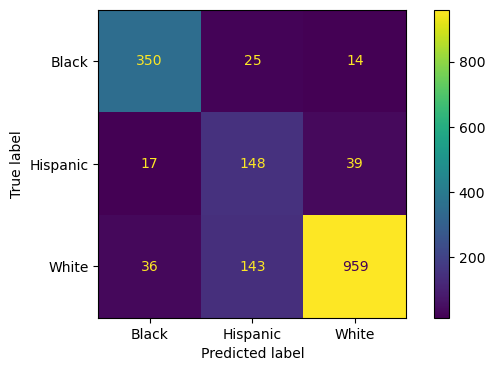

In [63]:
ConfusionMatrixDisplay.from_estimator(SVM_pipe_model_grid, X_test, y_test);

In [64]:
decision_function = SVM_pipe_model_grid.decision_function(X_test)
decision_function

array([[-0.27992461,  1.14416855,  2.27249548],
       [ 0.77336604, -0.25668866,  2.2818383 ],
       [-0.30590059,  0.84864205,  2.3076581 ],
       ...,
       [ 2.30459503,  0.76716941, -0.29742255],
       [-0.29795766,  1.24895005,  2.28183292],
       [ 1.23838896, -0.26508819,  2.19289522]])

In [65]:
predict_probe = SVM_pipe_model_grid.predict_proba(X_test)[:,1]
predict_probe


array([0.05139386, 0.01766793, 0.01495318, ..., 0.04202431, 0.16763658,
       0.04653941])

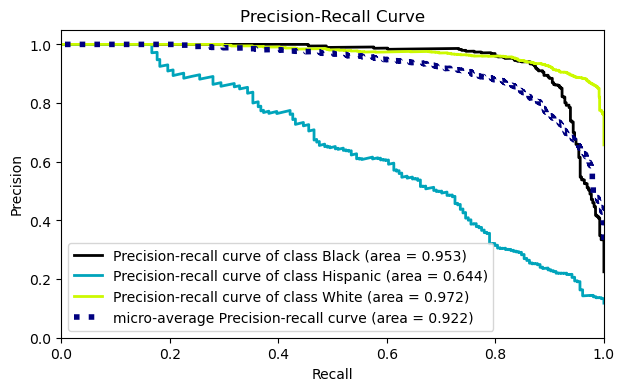

In [66]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=0.01, class_weight='balanced', kernel='linear')),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

# decision_function = model.decision_function(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [67]:
y_test_dummies = pd.get_dummies(y_test).values

In [68]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6441776976624913

In [69]:



svm_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
svm_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
snm_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [70]:

column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical),
                            remainder='passthrough',verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")


In [71]:



operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]  # max_depth=3

v_model = Pipeline(steps=operations)

v_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [72]:
eval_metric(v_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 292    2   95]
 [  18   10  176]
 [  20    3 1115]]
              precision    recall  f1-score   support

       Black       0.88      0.75      0.81       389
    Hispanic       0.67      0.05      0.09       204
       White       0.80      0.98      0.88      1138

    accuracy                           0.82      1731
   macro avg       0.79      0.59      0.60      1731
weighted avg       0.81      0.82      0.77      1731


Train_Set
[[ 909    0    0]
 [   0  475    0]
 [   0    0 2654]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       909
    Hispanic       1.00      1.00      1.00       475
       White       1.00      1.00      1.00      2654

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



### cross validation

In [73]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier( random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_f1_hispanic           0.118
train_f1_hispanic          1.000
test_precision_hispanic    0.667
train_precision_hispanic   1.000
test_recall_hispanic       0.065
train_recall_hispanic      1.000
dtype: float64

## RF - with balancing

In [74]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [75]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 266    2  121]
 [  17    7  180]
 [  13    1 1124]]
              precision    recall  f1-score   support

       Black       0.90      0.68      0.78       389
    Hispanic       0.70      0.03      0.07       204
       White       0.79      0.99      0.88      1138

    accuracy                           0.81      1731
   macro avg       0.80      0.57      0.57      1731
weighted avg       0.80      0.81      0.76      1731


Train_Set
[[ 909    0    0]
 [   0  475    0]
 [   0    0 2654]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       909
    Hispanic       1.00      1.00      1.00       475
       White       1.00      1.00      1.00      2654

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



In [76]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(max_depth=5, class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        random_state=101))])

In [77]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[305  54  30]
 [ 29 109  66]
 [ 95 357 686]]
              precision    recall  f1-score   support

       Black       0.71      0.78      0.75       389
    Hispanic       0.21      0.53      0.30       204
       White       0.88      0.60      0.71      1138

    accuracy                           0.64      1731
   macro avg       0.60      0.64      0.59      1731
weighted avg       0.76      0.64      0.67      1731


Train_Set
[[ 773   78   58]
 [  31  343  101]
 [ 200  735 1719]]
              precision    recall  f1-score   support

       Black       0.77      0.85      0.81       909
    Hispanic       0.30      0.72      0.42       475
       White       0.92      0.65      0.76      2654

    accuracy                           0.70      4038
   macro avg       0.66      0.74      0.66      4038
weighted avg       0.81      0.70      0.73      4038



### cross validation

In [78]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]


model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring, 
                        cv = 10,
                        return_train_score=True,
                        verbose =3)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  f1_hispanic: (train=1.000, test=0.000) precision_hispanic: (train=1.000, test=0.000) recall_hispanic: (train=1.000, test=0.000) total time=   2.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] END  f1_hispanic: (train=1.000, test=0.000) precision_hispanic: (train=1.000, test=0.000) recall_hispanic: (train=1.000, test=0.000) total time=   2.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


[CV] END  f1_hispanic: (train=1.000, test=0.041) precision_hispanic: (train=1.000, test=0.500) recall_hispanic: (train=1.000, test=0.021) total time=   2.4s
[CV] END  f1_hispanic: (train=1.000, test=0.118) precision_hispanic: (train=1.000, test=1.000) recall_hispanic: (train=1.000, test=0.062) total time=   2.4s
[CV] END  f1_hispanic: (train=1.000, test=0.000) precision_hispanic: (train=1.000, test=0.000) recall_hispanic: (train=1.000, test=0.000) total time=   2.1s
[CV] END  f1_hispanic: (train=1.000, test=0.000) precision_hispanic: (train=1.000, test=0.000) recall_hispanic: (train=1.000, test=0.000) total time=   2.1s
[CV] END  f1_hispanic: (train=1.000, test=0.118) precision_hispanic: (train=1.000, test=1.000) recall_hispanic: (train=1.000, test=0.062) total time=   2.1s
[CV] END  f1_hispanic: (train=1.000, test=0.078) precision_hispanic: (train=1.000, test=0.667) recall_hispanic: (train=1.000, test=0.042) total time=   2.1s
[CV] END  f1_hispanic: (train=1.000, test=0.000) precision

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   24.6s finished


test_f1_hispanic           0.043
train_f1_hispanic          1.000
test_precision_hispanic    0.383
train_precision_hispanic   1.000
test_recall_hispanic       0.023
train_recall_hispanic      1.000
dtype: float64

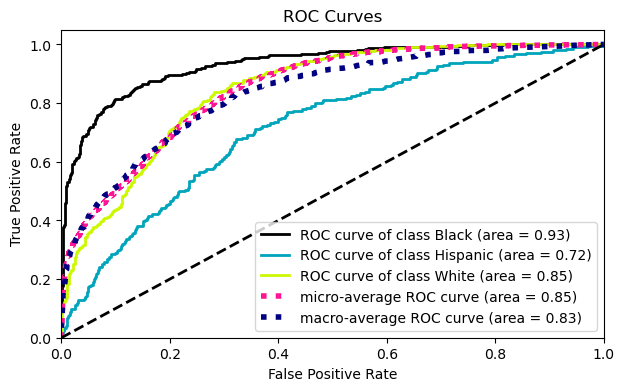

In [79]:
y_pred_probe = pipe_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_probe)
plt.show();

In [80]:
pipe_model["RF_model"].feature_importances_

array([0.00782195, 0.00015391, 0.00589733, 0.00078681, 0.00705669,
       0.00123178, 0.00323677, 0.00896063, 0.00180508, 0.00325442,
       0.00213079, 0.00534731, 0.04150644, 0.00273049, 0.00264024,
       0.01222118, 0.00525238, 0.00637377, 0.00298535, 0.00295551,
       0.02336588, 0.03320968, 0.04522819, 0.00135747, 0.00901368,
       0.00386913, 0.00313916, 0.00144681, 0.00461098, 0.00979222,
       0.00241168, 0.00183238, 0.00085683, 0.0190135 , 0.01840632,
       0.08476474, 0.05775923, 0.00199555, 0.00274496, 0.01303246,
       0.00228778, 0.00496872, 0.0208281 , 0.00161748, 0.00108559,
       0.00098763, 0.02702147, 0.0016781 , 0.01518978, 0.00711512,
       0.00221215, 0.03018796, 0.00302916, 0.00241324, 0.01203358,
       0.04587079, 0.00180622, 0.0007735 , 0.00574067, 0.00509545,
       0.01121606, 0.01448752, 0.00312862, 0.00270718, 0.00590747,
       0.0026884 , 0.00107786, 0.01270444, 0.00356061, 0.01822942,
       0.00277973, 0.00434083, 0.00025269, 0.07957982, 0.00151

In [81]:
features = pipe_model["encoder"].get_feature_names_out()
features

array(['Gender', 'WritingPreference', 'SubjectsBirthLocation',
       'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference',
       'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
       'forearmforearmbread

In [82]:
rf_feature_imp = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_, 
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

Feature Importance
elbowrestheight                              0.085
sittingheight                                0.080
eyeheightsitting                             0.058
interpupillarybreadth                        0.046
buttockpopliteallength                       0.045
bicristalbreadth                             0.042
buttockkneelength                            0.033
heelbreadth                                  0.030
handlength                                   0.027
buttockheight                                0.023
forearmhandlength                            0.021
wristheight                                  0.020
trochanterionheight                          0.020
earlength                                    0.019
waistbreadth                                 0.019
earprotrusion                                0.018
radialestylionlength                         0.018
waistbacklength                              0.016
stature                                      0.015
headcircumference                            0.015
lateralmalleolusheight                       0.014
forearmcenterofgriplength                    0.013
palmlength                                   0.013
tenthribheight                               0.013
bitragionchinarc                             0.012
iliocristaleheight                           0.012
lateralfemoralepicondyleheight               0.011
thighcircumference                           0.011
crotchheight                                 0.010
span                                         0.009
cervicaleheight                              0.009
axillaheight                                 0.009
waistfrontlengthsitting                      0.009
tibialheight                                 0.008
Gender                                       0.008
headlength                                   0.007
acromialheight                               0.007
bizygomaticbreadth                           0.006
neckcircumference                            0.006
SubjectsBirthLocation                        0.006
suprasternaleheight                          0.006
kneeheightmidpatella                         0.006
waistheightomphalion                         0.006
bicepscircumferenceflexed                    0.005
bitragionsubmandibulararc                    0.005
kneeheightsitting                            0.005
forearmforearmbreadth                        0.005
chestheight                                  0.005
tragiontopofhead                             0.004
shoulderelbowlength                          0.004
chestbreadth                                 0.004
waistcircumference                           0.004
verticaltrunkcircumferenceusa                0.004
thumbtipreach                                0.004
poplitealheight                              0.004
sleeveoutseam                                0.003
balloffootlength                             0.003
anklecircumference                           0.003
chestcircumference                           0.003
lowerthighcircumference                      0.003
hipbreadth                                   0.003
buttockcircumference                         0.003
buttockdepth                                 0.003
waistdepth                                   0.003
shouldercircumference                        0.003
footlength                                   0.003
bideltoidbreadth                             0.003
mentonsellionlength                          0.003
thighclearance                               0.003
neckcircumferencebase                        0.003
bimalleolarbreadth                           0.003
wristcircumference                           0.003
hipbreadthsitting                            0.002
crotchlengthomphalion                        0.002
forearmcircumferenceflexed                   0.002
heelanklecircumference                       0.002
biacromialbreadth                            0.002
Age                                          0.002
foo

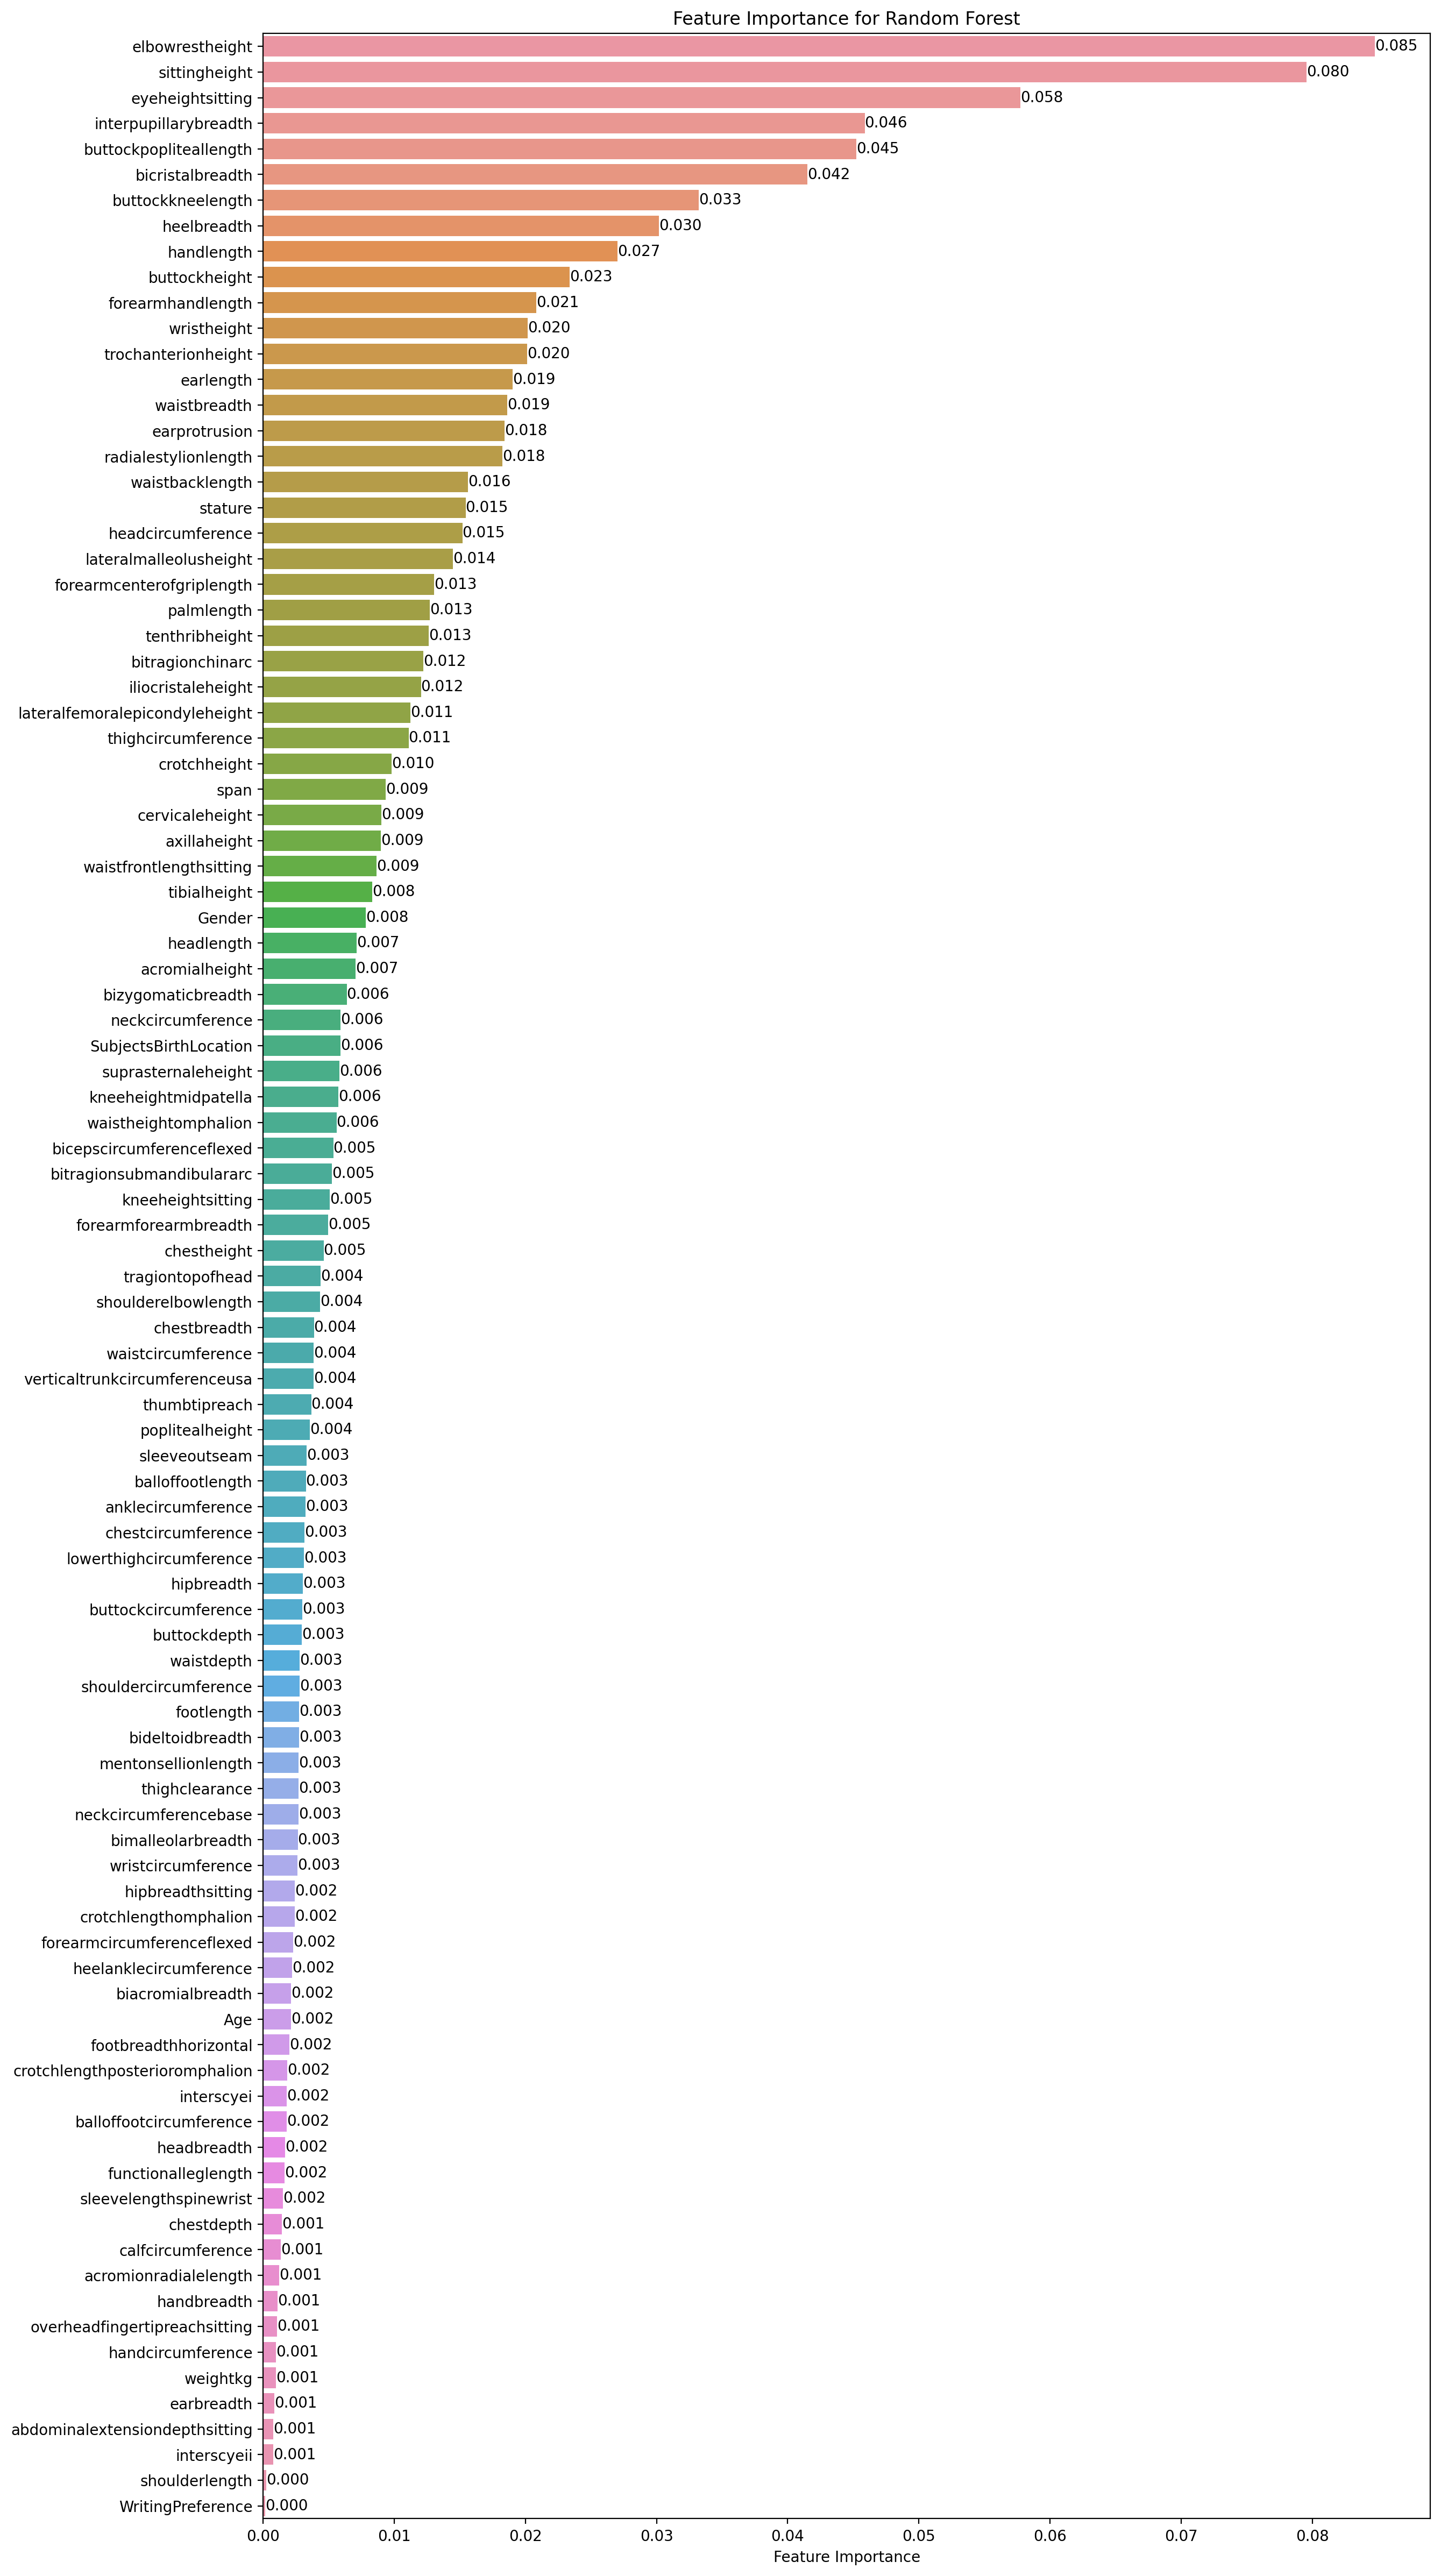

In [83]:

plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], 
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [84]:

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('')
    print(classification_report(y_test,model_pred))
    print('')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree],
              feature_names=features, #features_names=X.columns
              class_names=df.species.unique(),
              filled = True,
              fontsize = 8);


In [85]:
RF_model = RandomForestClassifier(random_state=101, 
                                  max_samples=0.5)

operations = [("encoder", column_trans), 
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)

pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_samples=0.5, random_state=101))])

In [86]:
eval_metric(pruned_tree, X_train, y_train, X_test, y_test)

Test_Set
[[ 285    5   99]
 [  18   10  176]
 [  19    4 1115]]
              precision    recall  f1-score   support

       Black       0.89      0.73      0.80       389
    Hispanic       0.53      0.05      0.09       204
       White       0.80      0.98      0.88      1138

    accuracy                           0.81      1731
   macro avg       0.74      0.59      0.59      1731
weighted avg       0.79      0.81      0.77      1731


Train_Set
[[ 894    0   15]
 [   2  374   99]
 [   0    0 2654]]
              precision    recall  f1-score   support

       Black       1.00      0.98      0.99       909
    Hispanic       1.00      0.79      0.88       475
       White       0.96      1.00      0.98      2654

    accuracy                           0.97      4038
   macro avg       0.99      0.92      0.95      4038
weighted avg       0.97      0.97      0.97      4038



### RF Model GridsearchCV

In [87]:
param_grid = {
    "RF_model__n_estimators": [300,400],
    "RF_model__max_depth": [2, 3],
    'RF_model__min_samples_split':[18,22],
    'RF_model__max_features': ['auto', 20]
}


In [88]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("encoder", column_trans), 
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)

In [89]:
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__max_features': ['auto', 20],
                         'RF_model__min_samples_split': [18, 22],
                         'RF_model__n_estimators': [300, 400]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [90]:
rf_grid_model.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features='auto',
                                        min_samples_split=18, n_estimators=400,
                                        random_state=101))])

In [91]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2,
 'RF_model__max_features': 'auto',
 'RF_model__min_samples_split': 18,
 'RF_model__n_estimators': 400}

In [92]:
rf_grid_model.best_score_

0.6105263157894737

In [93]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[270  88  31]
 [ 20 122  62]
 [ 93 446 599]]
              precision    recall  f1-score   support

       Black       0.70      0.69      0.70       389
    Hispanic       0.19      0.60      0.28       204
       White       0.87      0.53      0.65      1138

    accuracy                           0.57      1731
   macro avg       0.59      0.61      0.55      1731
weighted avg       0.75      0.57      0.62      1731


Train_Set
[[ 633  186   90]
 [  40  308  127]
 [ 208  950 1496]]
              precision    recall  f1-score   support

       Black       0.72      0.70      0.71       909
    Hispanic       0.21      0.65      0.32       475
       White       0.87      0.56      0.69      2654

    accuracy                           0.60      4038
   macro avg       0.60      0.64      0.57      4038
weighted avg       0.76      0.60      0.65      4038



In [94]:
rf_grid_model.best_score_


0.6105263157894737

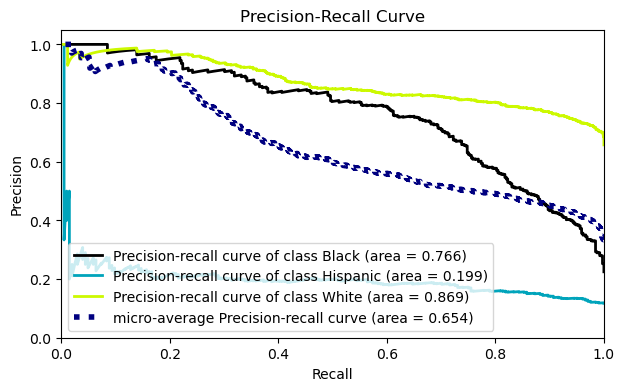

In [95]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [96]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.1989967874217325

In [97]:

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [98]:
# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms


In [99]:

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), categorical),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

column_trans = column_trans.set_output(transform="pandas")

In [100]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
df_copy2 = df_copy.copy()
#df_copy["DODRace"] = df_copy.DODRace.map({0: "Black", 1: "Hispanic", 2: "White"})
df_copy2["DODRace"] = df_copy2.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_copy2["DODRace"]


0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [101]:
df_copy2["DODRace"]

0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [102]:
# Split the data
X = df_copy2.drop(["DODRace"], axis=1)
y = df_copy2["DODRace"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [103]:

xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [104]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[220   9  31]
 [  9  41  86]
 [ 14   5 739]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.87       260
           1       0.75      0.30      0.43       136
           2       0.86      0.97      0.92       758

    accuracy                           0.87      1154
   macro avg       0.84      0.71      0.74      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### CV XGBoost Model

In [105]:

# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [106]:


xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   1.916
score_time                 0.033
test_f1_hispanic           0.440
train_f1_hispanic          1.000
test_precision_hispanic    0.723
train_precision_hispanic   1.000
test_recall_hispanic       0.317
train_recall_hispanic      1.000
dtype: float64

In [107]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[220   9  31]
 [  9  41  86]
 [ 14   5 739]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.87       260
           1       0.75      0.30      0.43       136
           2       0.86      0.97      0.92       758

    accuracy                           0.87      1154
   macro avg       0.84      0.71      0.74      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### Random Serach

In [108]:


# Define the hyperparameter space


param_grid = {"xgboost__n_estimators":[50,80],
              "xgboost__max_depth":[3,4],
              "xgboost__learning_rate": [0.8, 0.5],
              "xgboost__subsample":[0.5, 1],
}
xgb_classifier = XGBClassifier()
# Create a pipeline
pipe_model = Pipeline([
    ('preprocessor', column_trans),
    ('xgboost', xgb_classifier)
])


# Create the random search object
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    n_iter=1000,
    cv=10,
    verbose=2,
    return_train_score=True,
    scoring=f1_hispanic,
    n_jobs=-1,
)

# Fit the random search model
random_search.fit(X_train, y_train)



Fitting 10 folds for each of 16 candidates, totalling 160 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Gender',
                                                                                'WritingPreference',
                                                                                'SubjectsBirthLocation'])],
                                                                verbose_feature_names_out=False)),
                                             ('xgboost',
                                              XGBClassifier(base_score=None,
                                                            booster=N...
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None, ...))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'xgboost__learning_rate': [0.8, 0.5],
                                        'xgboost__max_depth': [3, 4],
                                        'xgboost__n_estimators': [50, 80],
                                        'xgboost__subsample': [0.5, 1]},
                   return_train_score=True,
                   scoring=make_scorer(f1_score, average=None, labels=[1]),
                   verbose=2)

In [109]:
# Print the best hyperparameters
print(random_search.best_params_)

{'xgboost__subsample': 1, 'xgboost__n_estimators': 80, 'xgboost__max_depth': 4, 'xgboost__learning_rate': 0.5}


In [110]:
pd.DataFrame(random_search.cv_results_).loc[
    random_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.510
mean_train_score   1.000
Name: 15, dtype: object

In [111]:
eval_metric(random_search, X_train, y_train, X_test, y_test)

Test_Set
[[225   9  26]
 [  8  51  77]
 [ 10  13 735]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.89       260
           1       0.70      0.38      0.49       136
           2       0.88      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.83      0.74      0.77      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [112]:
random_search.best_score_

0.5098383668291777

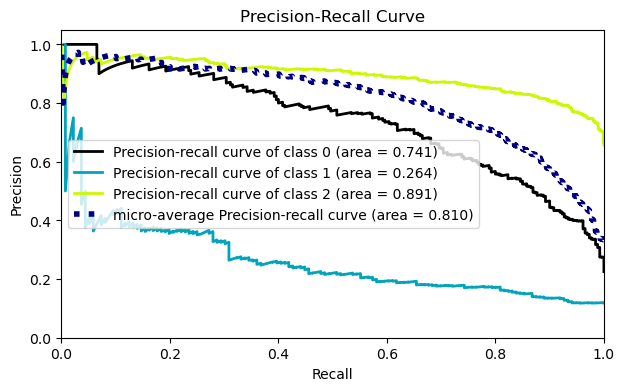

In [113]:


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [114]:
y_test_xgb_dummies = pd.get_dummies(y_test).values

In [115]:
y_pred = random_search.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=[1])

# comparing models 

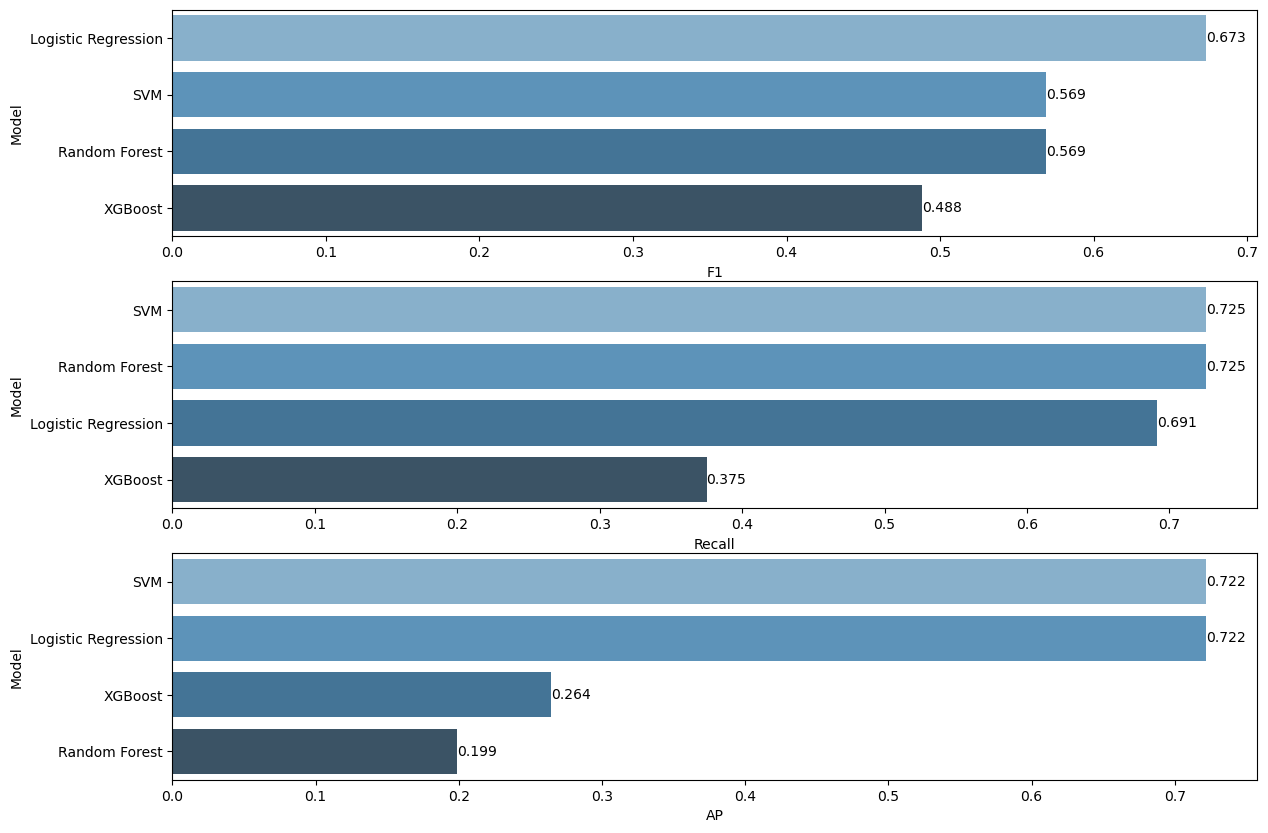

In [116]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [lr_f1[0], svm_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [lr_recall[0], snm_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [lr_AP, svm_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [117]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE

In [118]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical),
    remainder=StandardScaler(),
)

## SVC "Under Sampling"

In [119]:
X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test) # We shouldn't apply fit_transform to the TEST data.

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train_encoded, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 543), (1, 543), (2, 543)]


In [127]:

svm_resampled = SVC(C=1.5, class_weight='balanced',
                                    kernel='linear')

svm_resampled.fit(X_resampled, y_resampled)

SVC(C=1.5, class_weight='balanced', kernel='linear')

In [128]:
def eval_metric_(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_resampled)
    y_pred = model.predict(X_test_encoded)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_resampled, y_train_pred))
    print(classification_report(y_resampled, y_train_pred))

In [129]:
eval_metric_(svm_resampled, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[229  25   6]
 [  9 111  16]
 [ 49 140 569]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       260
           1       0.40      0.82      0.54       136
           2       0.96      0.75      0.84       758

    accuracy                           0.79      1154
   macro avg       0.72      0.82      0.74      1154
weighted avg       0.86      0.79      0.81      1154


Train_Set
[[533   8   2]
 [ 17 484  42]
 [  2  27 514]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       543
           1       0.93      0.89      0.91       543
           2       0.92      0.95      0.93       543

    accuracy                           0.94      1629
   macro avg       0.94      0.94      0.94      1629
weighted avg       0.94      0.94      0.94      1629



## SVC "Over Sampling"

## **Remember that while SMOTE can be helpful in many situations, it's not a one-size-fits-all solution, and its effectiveness can vary depending on the specific problem and dataset. It's important to carefully evaluate the performance of your model after using SMOTE and consider other techniques such as adjusting class weights or using different sampling strategies if necessary.**

In [130]:
#Using Somte to over sampling the data

X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test) # We shouldn't apply fit_transform to the TEST data.

# Apply SMOTE to the training data only
smote = SMOTE(sampling_strategy='auto', random_state=101)
X_resampled_Over, y_resampled_Over = smote.fit_resample(X_train_encoded, y_train)

print(sorted(Counter(y_resampled).items()))

[(0, 543), (1, 543), (2, 543)]


In [131]:
# Implement the LogisticRegression model with the balanced data

svm_resampled = SVC(C=0.5, class_weight='balanced',
                                    kernel='linear')

svm_resampled.fit(X_resampled, y_resampled)

SVC(C=0.5, class_weight='balanced', kernel='linear')

In [133]:
eval_metric_(svm_resampled, X_resampled_Over, y_resampled_Over, X_test, y_test)

Test_Set
[[232  23   5]
 [  8 109  19]
 [ 44 135 579]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       260
           1       0.41      0.80      0.54       136
           2       0.96      0.76      0.85       758

    accuracy                           0.80      1154
   macro avg       0.73      0.82      0.75      1154
weighted avg       0.86      0.80      0.81      1154


Train_Set
[[526  12   5]
 [ 18 470  55]
 [  2  31 510]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       543
           1       0.92      0.87      0.89       543
           2       0.89      0.94      0.92       543

    accuracy                           0.92      1629
   macro avg       0.92      0.92      0.92      1629
weighted avg       0.92      0.92      0.92      1629



# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [134]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical),
    remainder=StandardScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [135]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [136]:
X[X.Gender == "Male"].describe()


abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
count                        3899.000        3899.000               3899.000   
mean                          255.449        1442.946                335.819   
std                            37.295          62.357                 17.281   
min                           163.000        1194.000                270.000   
25%                           228.000        1401.000                324.000   
50%                           252.000        1441.000                335.000   
75%                           280.000        1483.000                347.000   
max                           451.000        1683.000                393.000   

       anklecircumference  axillaheight  balloffootcircumference  \
count            3899.000      3899.000                 3899.000   
mean              229.591      1331.098                  252.166   
std                14.579        58.714                   12.894   
min               156.000      1106.000                  186.000   
25%               220.000      1291.000                  244.000   
50%               229.000      1330.000                  252.000   
75%               239.000      1368.000                  261.000   
max               293.000      1553.000                  306.000   

       balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
count          3899.000           3899.000                   3899.000   
mean            201.230            416.004                    358.580   
std              10.329             19.075                     34.512   
min             156.000            337.000                    246.000   
25%             194.000            403.000                    335.000   
50%             201.000            415.000                    358.000   
75%             208.000            428.000                    380.000   
max             245.000            489.000                    490.000   

       bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
count          3899.000          3899.000            3899.000   
mean            275.632           510.928              74.844   
std              17.512            32.450               4.097   
min             219.000           374.000              59.000   
25%             263.000           489.500              72.000   
50%             275.000           510.000              75.000   
75%             288.000           532.000              77.000   
max             334.000           637.000              91.000   

       bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
count          3899.000                   3899.000            3899.000   
mean            331.656                    315.718             142.435   
std              13.971                     16.641               6.142   
min             281.000                    259.000             120.000   
25%             322.000                    305.000             138.000   
50%             332.000                    315.000             142.000   
75%             341.000                    326.000             147.000   
max             385.000                    390.000             166.000   

       buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
count              3899.000      3899.000       3899.000           3899.000   
mean               1021.294       246.362        889.500            619.217   
std                  76.331        26.422         49.412             30.060   
min                 737.000       171.000        716.000            518.000   
25%                 968.500       227.000        855.000            599.000   
50%                1018.000       246.000        887.000            618.000   
75%                1070.000       263.000        921.000            640.000   
max                1305.000       343.000       1080.000            736.000   

       buttockpopliteallength  calfcircumference  

In [137]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting    255.449
acromialheight                   1442.946
acromionradialelength             335.819
anklecircumference                229.591
axillaheight                     1331.098
balloffootcircumference           252.166
balloffootlength                  201.230
biacromialbreadth                 416.004
bicepscircumferenceflexed         358.580
bicristalbreadth                  275.632
bideltoidbreadth                  510.928
bimalleolarbreadth                 74.844
bitragionchinarc                  331.656
bitragionsubmandibulararc         315.718
bizygomaticbreadth                142.435
buttockcircumference             1021.294
buttockdepth                      246.362
buttockheight                     889.500
buttockkneelength                 619.217
buttockpopliteallength            504.001
calfcircumference                 392.427
cervicaleheight                  1519.422
chestbreadth                      289.787
chestcircumference               1

In [138]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "Texas"
male_mean_human["WritingPreference"] = "Left hand"

In [139]:
pd.DataFrame(male_mean_human).T

abdominalextensiondepthsitting acromialheight acromionradialelength  \
mean                        255.449       1442.946               335.819   

     anklecircumference axillaheight balloffootcircumference balloffootlength  \
mean            229.591     1331.098                 252.166          201.230   

     biacromialbreadth bicepscircumferenceflexed bicristalbreadth  \
mean           416.004                   358.580          275.632   

     bideltoidbreadth bimalleolarbreadth bitragionchinarc  \
mean          510.928             74.844          331.656   

     bitragionsubmandibulararc bizygomaticbreadth buttockcircumference  \
mean                   315.718            142.435             1021.294   

     buttockdepth buttockheight buttockkneelength buttockpopliteallength  \
mean      246.362       889.500           619.217                504.001   

     calfcircumference cervicaleheight chestbreadth chestcircumference  \
mean           392.427        1519.422      289.787           1060.497   

     chestdepth chestheight crotchheight crotchlengthomphalion  \
mean    254.390    1293.040      847.638               623.143   

     crotchlengthposterioromphalion earbreadth earlength earprotrusion  \
mean                        356.355     36.095    64.171        23.110   

     elbowrestheight eyeheightsitting footbreadthhorizontal footlength  \
mean         244.824          804.885               101.894    271.574   

     forearmcenterofgriplength forearmcircumferenceflexed  \
mean                   349.573                    310.528   

     forearmforearmbreadth forearmhandlength functionalleglength handbreadth  \
mean               580.702           480.929            1132.126      88.380   

     handcircumference handlength headbreadth headcircumference headlength  \
mean           212.571    193.509     154.184           574.708    199.761   

     heelanklecircumference heelbreadth hipbreadth hipbreadthsitting  \
mean                344.002      72.565    346.257           379.948   

     iliocristaleheight interpupillarybreadth interscyei interscyeii  \
mean           1063.413               639.949    431.394     450.629   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight  \
mean              489.367           555.225                        492.626   

     lateralmalleolusheight lowerthighcircumference mentonsellionlength  \
mean                 73.062                 409.671             122.685   

     neckcircumference neckcircumferencebase overheadfingertipreachsitting  \
mean           398.192               435.160                      1428.469   

     palmlength poplitealheight radialestylionlength shouldercircumference  \
mean    116.610         430.685              268.314              1179.903   

     shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist  \
mean             364.306        149.832       918.679                897.179   

     sleeveoutseam     span  stature suprasternaleheight tenthribheight  \
mean       594.008 1816.629 1758.385            1440.700       1122.444   

     thighcircumference thighclearance thumbtipreach tibialheight  \
mean            626.335        180.739       813.085      469.223   

     tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa  \
mean          131.117             902.587                      1666.783   

     waistbacklength waistbreadth waistcircumference waistdepth  \
mean         478.018      327.111            943.043    238.560   

     waistfrontlengthsitting waistheightomphalion weightkg wristcircumference  \
mean                 388.017             1058.240   85.871            176.169   

     wristheight Gender SubjectsBirthLocation    Age WritingPreference  
mean     848.762   Male                 Texas 30.172         Left hand

In [140]:
final_model.predict(pd.DataFrame(male_mean_human).T)


array([1], dtype=int64)

In [141]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7949522782473502

In [142]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7866664072077681

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___